## Importing modules

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from scipy.stats import zscore
from scipy import stats

## Loading data

In [3]:
#load the csv dataA from the directory
dfA = pd.read_csv("DataA.csv")
dfA.head()

,Unnamed: 0,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,...,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition,SalePrice
0,681,60,RL,65,8200,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,7,2007,WD,Normal,219500
1,1601,160,RM,21,1890,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,6,2010,WD,Normal,85500
2,819,20,RL,60,8172,Pave,None,Reg,HLS,AllPub,...,0,None,None,None,0,10,2007,COD,Family,79275
3,910,20,RL,None,7980,Pave,None,IR1,Lvl,AllPub,...,0,None,GdPrv,Shed,500,3,2010,WD,Normal,185000
4,330,90,RL,64,6979,Pave,None,Reg,Lvl,AllPub,...,0,None,GdPrv,Shed,600,6,2010,WD,Normal,144000


In [4]:
# Load the csv dataB from the directory
dfB = pd.read_csv("DataB.csv")
dfB.head()

,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,...,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,80,RL,85,11475,Pave,None,Reg,Lvl,AllPub,Corner,...,0,0,None,None,None,0,9,2009,WD,Normal
1,20,RL,107,13891,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,10,2007,New,Partial
2,20,RL,85,14082,Pave,None,IR1,HLS,AllPub,Inside,...,0,0,None,None,None,0,1,2007,WD,Normal
3,20,RL,65,14753,Pave,None,IR2,Low,AllPub,Inside,...,0,0,None,GdPrv,None,0,12,2009,WD,Normal
4,20,RL,87,10367,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,6,2009,ConLI,Normal


## Descriptive analysis

In [5]:
dfA.describe()

,Unnamed: 0,MS.SubClass,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,...,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold,SalePrice
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1001.578000,58.030000,10613.570000,6.059000,5.547000,1972.404000,1983.827000,1145.362000,323.476000,4.39100,...,88.918000,43.08300,23.78200,1.842000,16.400000,1.803000,43.616000,6.177000,2007.773000,179212.891000
std,572.192506,44.021097,10448.051407,1.365058,1.079331,29.107181,20.943393,367.501306,423.221535,42.75369,...,120.242053,61.61601,69.26354,18.458108,56.192095,29.775103,516.849241,2.674102,1.310415,77814.703251
min,0.000000,20.000000,1476.000000,1.000000,1.000000,1880.000000,1950.000000,407.000000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,520.500000,20.000000,7500.000000,5.000000,5.000000,1954.000000,1964.750000,864.000000,0.000000,0.00000,...,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,128975.000000
50%,989.000000,50.000000,9316.000000,6.000000,5.000000,1975.000000,1992.000000,1068.500000,0.000000,0.00000,...,0.000000,24.00000,0.00000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160750.000000
75%,1508.250000,70.000000,11617.500000,7.000000,6.000000,2001.000000,2004.000000,1387.750000,702.500000,0.00000,...,168.000000,66.00000,0.00000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213492.500000
max,1997.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,2726.000000,2065.000000,528.00000,...,690.000000,742.00000,1012.00000,290.000000,480.000000,576.000000,15500.000000,12.000000,2010.000000,755000.000000


### Sales price distribution

C:\Users\marti\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


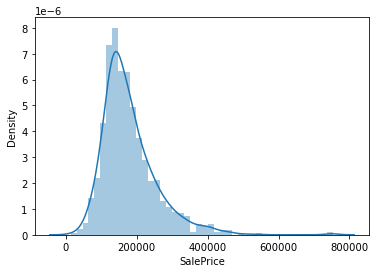

In [6]:
sns.distplot(dfA['SalePrice']);

In [7]:
dfA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       1000 non-null   int64 
 1   MS.SubClass      1000 non-null   int64 
 2   MS.Zoning        1000 non-null   object
 3   Lot.Frontage     1000 non-null   object
 4   Lot.Area         1000 non-null   int64 
 5   Street           1000 non-null   object
 6   Alley            1000 non-null   object
 7   Lot.Shape        1000 non-null   object
 8   Land.Contour     1000 non-null   object
 9   Utilities        1000 non-null   object
 10  Lot.Config       1000 non-null   object
 11  Land.Slope       1000 non-null   object
 12  Neighborhood     1000 non-null   object
 13  Condition.1      1000 non-null   object
 14  Condition.2      1000 non-null   object
 15  Bldg.Type        1000 non-null   object
 16  House.Style      1000 non-null   object
 17  Overall.Qual     1000 non-null   i

In [6]:
z = np.abs(stats.zscore(dfA['SalePrice']))
print(z)

[5.17990380e-01 1.20491088e+00 1.28494864e+00 7.44075925e-02
 4.52748763e-01 4.13096564e-02 5.24419116e-01 6.32753373e-01
 8.52284654e-01 4.01318875e-01 9.02760286e-01 8.32998446e-01
 5.41133829e-01 1.27562698e+00 1.29491319e+00 5.62037276e-01
 5.36322332e-01 1.09657662e+00 2.04162642e-02 8.51330398e-01
 4.47274283e-01 6.19895900e-01 4.39891291e-01 1.16312410e+00
 2.22268522e-01 1.28334146e+00 4.60131755e-01 1.23705456e+00
 1.79730885e+00 1.11586283e+00 1.52601619e+00 1.70838633e-01
 6.28358676e-02 7.22755677e-01 7.18926953e-01 8.83448479e-03
 4.01318875e-01 3.44414506e-01 7.87043038e-01 4.08701867e-01
 2.02642901e+00 1.08436203e+00 4.60131755e-01 2.35125994e-01
 2.98459098e-01 2.27743002e-01 5.01607157e-01 7.44075925e-02
 2.20234482e-02 3.69175195e-01 8.38472926e-01 9.34903967e-01
 8.11678198e-02 5.81297885e-03 6.40136364e-01 5.94180956e-01
 1.19300766e+00 9.41332703e-01 1.42444216e+00 5.41671285e-02
 5.10607388e-01 3.75603931e-01 8.66145009e-01 1.21133962e+00
 1.15348099e+00 6.529938

### Removing outlier from saleprice

In [7]:
Q1 = np.percentile(dfA['SalePrice'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(dfA['SalePrice'], 75,
                   interpolation = 'midpoint') 
IQR1 = Q3 - Q1 

In [8]:
print("Old Shape: ", dfA.shape) 
  
# Upper bound
upper = np.where(dfA['SalePrice'] >= (Q3+1.5*IQR1))
# Lower bound
lower = np.where(dfA['SalePrice'] <= (Q1-1.5*IQR1))
  
''' Removing the Outliers '''
dfA.drop(upper[0], inplace = True)
dfA.drop(lower[0], inplace = True)
  
print("New Shape: ", dfA.shape)

Old Shape:  (1000, 81)
New Shape:  (959, 81)


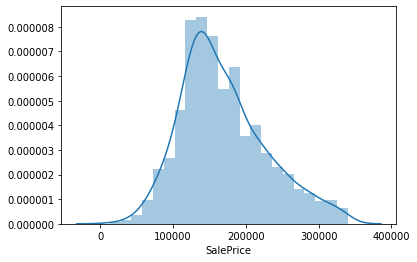

In [9]:
sns.distplot(dfA['SalePrice']);

### Removing outlier from general living

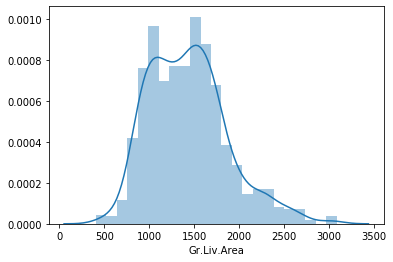

In [10]:
sns.distplot(dfA['Gr.Liv.Area']);

In [11]:
Q1 = np.percentile(dfA['Gr.Liv.Area'], 25, 
                   interpolation = 'midpoint') 
  
Q3 = np.percentile(dfA['Gr.Liv.Area'], 75,
                   interpolation = 'midpoint') 
IQR2 = Q3 - Q1 

In [12]:
print("Old Shape: ", dfA.shape) 
  
# Upper bound
upper = np.where(dfA['Gr.Liv.Area'] >= (Q3+1.5*IQR2))
# Lower bound
lower = np.where(dfA['Gr.Liv.Area'] <= (Q1-1.5*IQR2))
  
''' Removing the Outliers '''
dfA.drop(upper[0], inplace = True)
dfA.drop(lower[0], inplace = True)
  
print("New Shape: ", dfA.shape)

Old Shape:  (959, 81)
New Shape:  (943, 81)


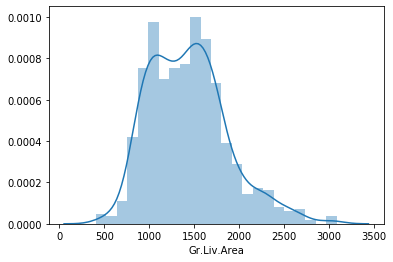

In [13]:
sns.distplot(dfA['Gr.Liv.Area']);

### Plotting data

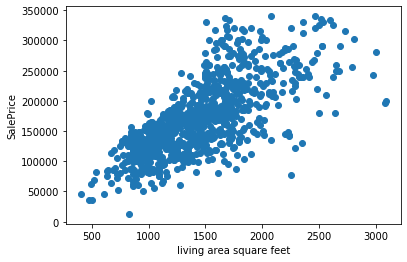

In [14]:
Y = dfA['SalePrice'].values
X = dfA['Gr.Liv.Area'].values
plt.scatter(X,Y)
plt.ylabel('SalePrice')
plt.xlabel('living area square feet')
plt.show()

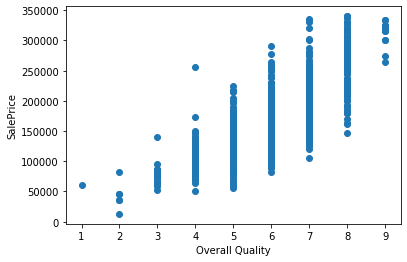

In [15]:
Y = dfA["SalePrice"].values
X2 = dfA["Overall.Qual"].values
plt.scatter(X2,Y)
plt.ylabel('SalePrice')
plt.xlabel('Overall Quality')
plt.show()

### Create correlation heatmap

[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'MS.SubClass'),
 Text(2.5, 0, 'Lot.Area'),
 Text(3.5, 0, 'Overall.Qual'),
 Text(4.5, 0, 'Overall.Cond'),
 Text(5.5, 0, 'Year.Built'),
 Text(6.5, 0, 'Year.Remod.Add'),
 Text(7.5, 0, 'X1st.Flr.SF'),
 Text(8.5, 0, 'X2nd.Flr.SF'),
 Text(9.5, 0, 'Low.Qual.Fin.SF'),
 Text(10.5, 0, 'Gr.Liv.Area'),
 Text(11.5, 0, 'Full.Bath'),
 Text(12.5, 0, 'Half.Bath'),
 Text(13.5, 0, 'Bedroom.AbvGr'),
 Text(14.5, 0, 'Kitchen.AbvGr'),
 Text(15.5, 0, 'TotRms.AbvGrd'),
 Text(16.5, 0, 'Fireplaces'),
 Text(17.5, 0, 'Wood.Deck.SF'),
 Text(18.5, 0, 'Open.Porch.SF'),
 Text(19.5, 0, 'Enclosed.Porch'),
 Text(20.5, 0, 'X3Ssn.Porch'),
 Text(21.5, 0, 'Screen.Porch'),
 Text(22.5, 0, 'Pool.Area'),
 Text(23.5, 0, 'Misc.Val'),
 Text(24.5, 0, 'Mo.Sold'),
 Text(25.5, 0, 'Yr.Sold'),
 Text(26.5, 0, 'SalePrice')]

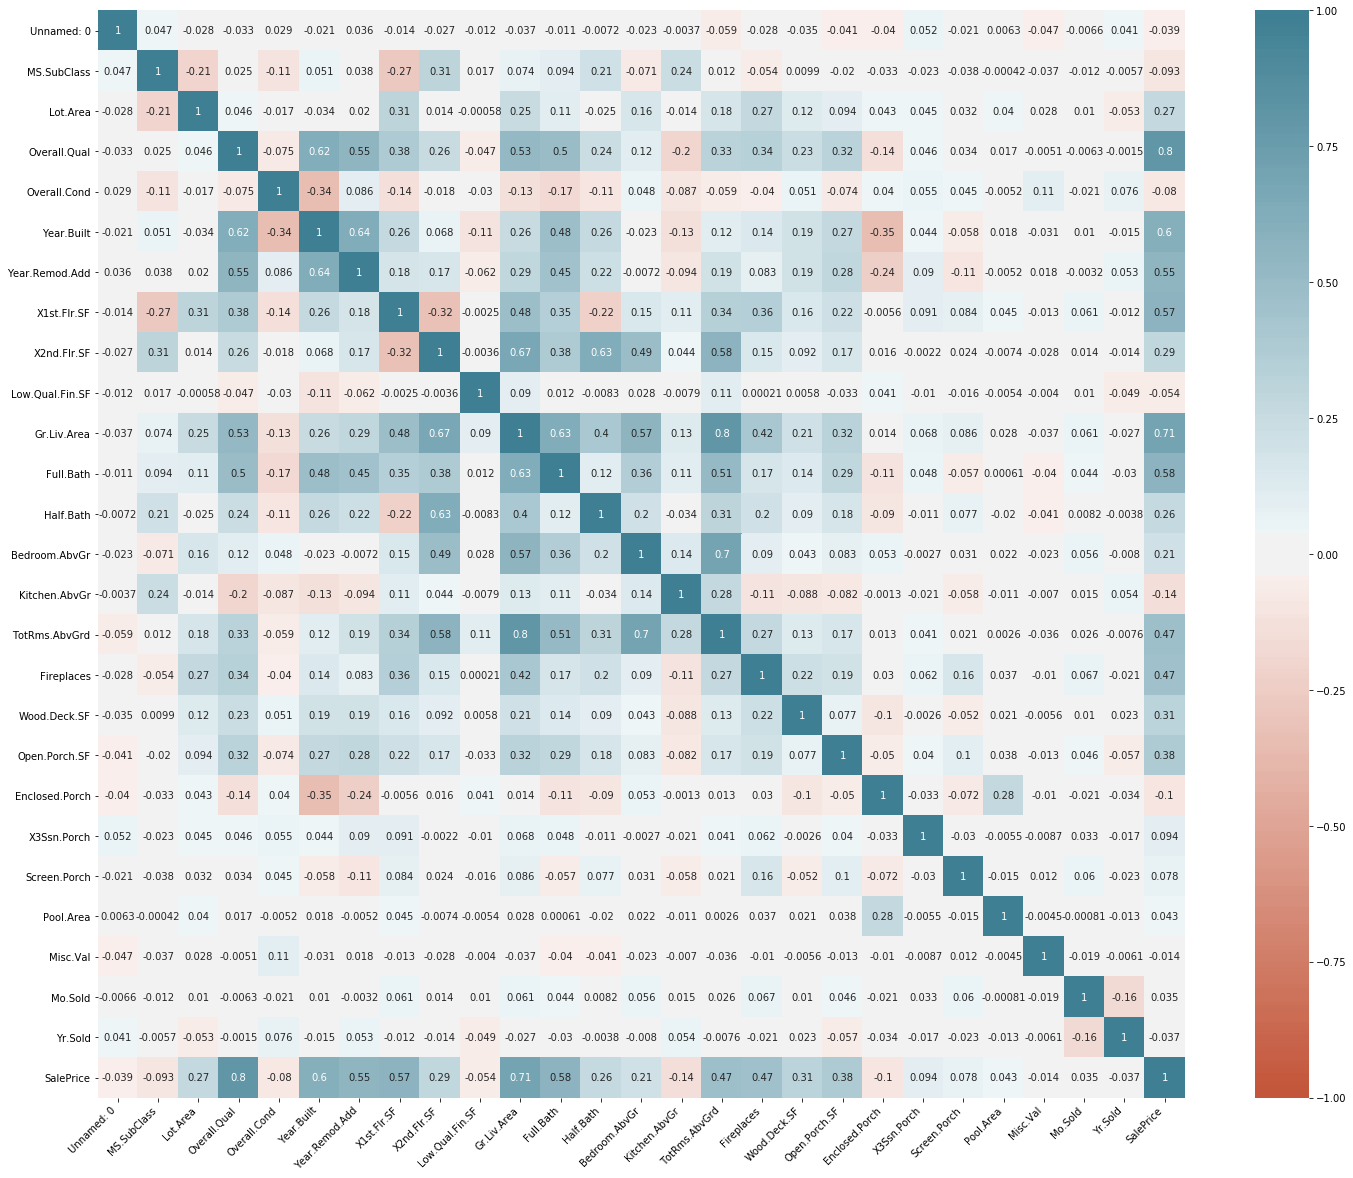

In [16]:
# create heatmap to find the variables with most correlation
corr = dfA.corr()
plt.figure(figsize=(25,20))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

## Build model

In [17]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.5, test_size = 0.5, random_state=42)

In [18]:
#set linear regression model
linreg = LinearRegression()
X = X.reshape(-1,1)

In [19]:
# Preform K-Fold crossvaldiation on linear regression and polynomial regression of different degrees
kf = KFold(n_splits=10, random_state=None, shuffle=False)

for degree in range(1,11):
    poly = PolynomialFeatures(degree=degree)
    X_current = poly.fit_transform(X)
    model = linreg.fit(X_current, Y)
    scores = cross_val_score(model, X_current, Y, scoring="neg_mean_squared_error", cv=kf, n_jobs=1)
    
    print("Degree-"+str(degree)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 1766218864.1835315, STD: 186416607.38889825
Degree-2 polynomial MSE: 1727374515.9612815, STD: 183723162.06441697
Degree-3 polynomial MSE: 1718266114.8085854, STD: 187152910.1494762
Degree-4 polynomial MSE: 1718504648.7532234, STD: 192926305.0925191
Degree-5 polynomial MSE: 1719010829.0702987, STD: 192728391.6561918
Degree-6 polynomial MSE: 1717354943.1586983, STD: 191350498.54085135
Degree-7 polynomial MSE: 1713920925.6234078, STD: 186521389.86679733
Degree-8 polynomial MSE: 1715541234.9672832, STD: 179109635.445474
Degree-9 polynomial MSE: 1733467378.594867, STD: 173108912.72372895
Degree-10 polynomial MSE: 1777458405.455255, STD: 173761442.04588103


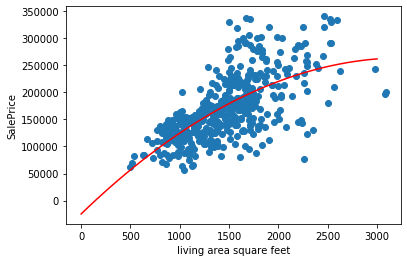

In [37]:
poly_model = np.poly1d(np.polyfit(X_train, Y_train, 2))

line = np.linspace(1, 3000, 40)
plt.scatter(X_train, Y_train)
plt.xlabel('living area square feet')
plt.ylabel('SalePrice')
plt.plot(line, poly_model(line), color = 'red')
plt.show()

In [38]:
y_poly_pred1 = poly_model(X_train)

rmse = np.sqrt(mean_squared_error(Y_train, y_poly_pred1))
r2 = r2_score(Y_train, y_poly_pred1)
print(f'RMSE is: {rmse}')
print(f'r2 score is {r2}')

RMSE is: 44027.54842818532
r2 score is 0.4484231701526471


## Test Model

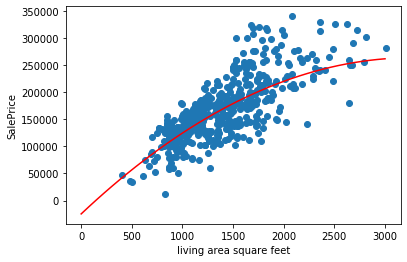

In [22]:
poly_model = np.poly1d(np.polyfit(X_train, Y_train, 2))

line = np.linspace(1, 3000, 40)
plt.scatter(X_test, Y_test)
plt.xlabel('living area square feet')
plt.ylabel('SalePrice')
plt.plot(line, poly_model(line), color = 'red')
plt.show()

In [23]:
y_poly_pred2 = poly_model(X_test)

rmse = np.sqrt(mean_squared_error(Y_test, y_poly_pred2))
r2 = r2_score(Y_test, y_poly_pred2)
print(f'RMSE is {rmse}')
print(f'r2 score is {r2}')

RMSE is 38847.177946428885
r2 score is 0.5696316002402375


# Testing model on overall qual

In [34]:
X2_train, X2_test, Y_train, Y_test = train_test_split(X2, Y, train_size = 0.5, test_size = 0.5, random_state=42)

In [35]:
#set linear regression model
linreg = LinearRegression()
X2 = X2.reshape(-1,1)

In [36]:
# Preform K-Fold crossvaldiation on linear regression and polynomial regression of different degrees
kf = KFold(n_splits=10, random_state=None, shuffle=False)

for degree in range(1,11):
    poly = PolynomialFeatures(degree=degree)
    X_current = poly.fit_transform(X2)
    model = linreg.fit(X_current, Y)
    scores = cross_val_score(model, X_current, Y, scoring="neg_mean_squared_error", cv=kf, n_jobs=1)
    
    print("Degree-"+str(degree)+" polynomial MSE: " + str(np.mean(np.abs(scores))) + ", STD: " + str(np.std(scores)))

Degree-1 polynomial MSE: 1268734645.2005174, STD: 228483166.6280752
Degree-2 polynomial MSE: 1218650256.5467324, STD: 249262419.1777552
Degree-3 polynomial MSE: 1216979439.7672849, STD: 252874467.59344542
Degree-4 polynomial MSE: 1226915522.6071532, STD: 262973208.0766538
Degree-5 polynomial MSE: 1217195016.3359702, STD: 253287104.01157925
Degree-6 polynomial MSE: 1239814075.391752, STD: 280841110.0205812
Degree-7 polynomial MSE: 1221101605.7498205, STD: 253023416.75017476
Degree-8 polynomial MSE: 1225458952.5569072, STD: 256078017.59379628
Degree-9 polynomial MSE: 1226173916.1191735, STD: 256896166.98261547
Degree-10 polynomial MSE: 1225613998.1389244, STD: 256254136.01638606


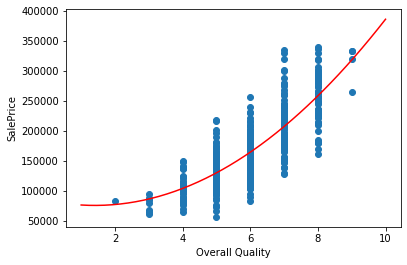

In [37]:
poly_model1 = np.poly1d(np.polyfit(X2_train, Y_train, 2))

line = np.linspace(1, 10, 40)
plt.scatter(X2_train, Y_train)
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.plot(line, poly_model1(line), color = 'red')
plt.show()

In [38]:
y_poly_pred2 = poly_model1(X2_train)

rmse = np.sqrt(mean_squared_error(Y_train, y_poly_pred2))
r2 = r2_score(Y_train, y_poly_pred2)
print(f'RMSE is: {rmse}')
print(f'r2 score is {r2}')

RMSE is: 34325.080826303885
r2 score is 0.6647412320863949


### Test model

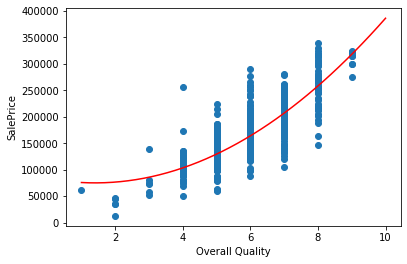

In [39]:
poly_model1 = np.poly1d(np.polyfit(X2_train, Y_train, 2))

line = np.linspace(1, 10, 40)
plt.scatter(X2_test, Y_test)
plt.xlabel('Overall Quality')
plt.ylabel('SalePrice')
plt.plot(line, poly_model1(line), color = 'red')
plt.show()

In [40]:
y_poly_pred2 = poly_model1(X2_test)

rmse = np.sqrt(mean_squared_error(Y_test, y_poly_pred2))
r2 = r2_score(Y_test, y_poly_pred2)
print(f'RMSE is {rmse}')
print(f'r2 score is {r2}')

RMSE is 35479.94629809863
r2 score is 0.6410058818581721
